# 1. Introduction
Missing values are a common problem in machine learning and data science projects. Failure to handle missing data correctly can skew the results of machine learning models or reduce the model's accuracy. To overcome these obstacles, we must either carefully remove missing values or carefully complete them. Either way, our goal is to create a complete dataset that will put our analysis on a solid footing. Ignoring missing data can directly affect the performance and reliability of our models. Therefore, it is extremely important to know the different techniques for dealing with missing values and choose the right method. While dealing with missing values is not our ultimate goal, it plays a critical role in data preprocessing steps and can help to significantly improve model performance. In this article, I will explain the causes and types of missing data and the advantages and disadvantages of various methods to deal with this problem.

Missing data can be caused by merging data sources, accidents or measurement errors during data collection, lack of records, respondent unwillingness to provide information, etc.

# 2. Dataset
In this article, I will use the “UCI Heart Disease Data” set available in the UCI Data Repository. This dataset aims to predict whether a patient has heart disease based on certain characteristics. You can access the dataset here;

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
https://archive.ics.uci.edu/dataset/45/heart+disease
In the dataset, the target variable is given in 5 groups. These groups will be reduced to 2 (with heart disease, and without heart disease) and evaluated.

In addition, since this study does not focus on model development, I will encode the categorical variables and make the entire dataset numerical. The dataset I will use in the scope of the article looks as follows.



# import library 

In [58]:
import numpy as np # For linear algebra operations and numerical computations
import pandas as pd # For data analysis and manipulation using data frames

import missingno as msno # For visualizing missing data patterns

from sklearn.preprocessing import LabelEncoder # For converting categorical data to numerical values
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score # For calculating the accuracy score of a classification model
from sklearn.impute import KNNImputer # For imputing missing values using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classification model
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier model
from sklearn.metrics import mean_squared_error # Performance metric for regression models
from sklearn.impute import SimpleImputer # For imputing missing values with a simple strategy
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier # XGBoost classification model

# open and see dataframe

In [59]:
df = pd.read_csv("/home/reza/Desktop/git hub/Notes/machine learning/fill_missing_value/heart_disease_uci.csv")
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# report of null value

In [60]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# clean data sets

In [61]:
def clean_data(df : pd.DataFrame) -> pd.DataFrame:
    df["num"] = df["num"].replace({2 : 1, 3 : 1, 4 : 1})
    df = df.drop("id" , axis=1)
    categorical_columns = df.select_dtypes(['object']).columns
    LabelEncoder_model = LabelEncoder()
    
    for column in categorical_columns:
        df[column] = LabelEncoder_model.fit_transform(df[column])
    return df

# spilt dataset to test and train

In [62]:
def split_data(df : pd.DataFrame) -> pd.DataFrame:
    X = df.drop("num", axis=1)
    y = df["num"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# train a random forest model

In [63]:
def train_model_rf(X_train, X_test, y_train, y_test, method) -> dict:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {
        "model" : model,
        "y_pred" : y_pred,
        "accuracy" : accuracy,
        "method" : method
    }
    

# 1- Delete Missing Data

If models that do not tolerate missing data are to be used, the missing values must be removed from the data set. The simplest approach is to delete all samples that contain missing values. Missing values can be eliminated by removing variables that contain at least one missing value. Similarly, removing all columns with missing values from the data set is another approach. Before using these approaches, however, some aspects of the data need to be carefully considered. The size of the data after deletion of missing data, the randomness of missing data, or the ratio of missing data to the entire data set are critical points to consider when applying these approaches.


This category consists of 3 stages. These stages are:

* Pairwise Deletions
* Listwise Deletions
* Dropping Entire Columns


## 1.1 Pairwise Deletions

If each data point has at least one missing value, that row of data is deleted from the entire list. 
This method can be used when the amount of missing data is small and the missing values are randomly distributed.


- Pros:

It is very useful for simplicity and computational efficiency.


- Cons:

It leads to a loss of information and a reduction in the number of samples. This can lead to insufficient data for the model.

In [64]:
df = clean_data(df)

df_pairwise = df.dropna()
X_train, X_test, y_train, y_test = split_data(df_pairwise)
result_pairwise = train_model_rf(X_train, X_test, y_train, y_test, "pairwise ")

print("model : ", result_pairwise["model"], " | " , "accuracy : ",  result_pairwise["accuracy"], " | method : ", result_pairwise["method"])

model :  RandomForestClassifier()  |  accuracy :  0.8709677419354839  | method :  pairwise 


## 1.2 Listwise Deletions

All data instances with missing data from more than one variable are deleted. This method can be used when the amount of missing data is large or when the missing values are distributed according to a certain pattern.


- Pros:

As with Pairwise Deletions, it is very simple and low-cost to implement.
- Cons:

It may reduce the number of samples. This can lead to a destabilization of the dataset and loss of correlation.

In [65]:
df_listwise = df.dropna(subset=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])
X_train, X_test, y_train, y_test = split_data(df_listwise)

result_listwise = train_model_rf(X_train, X_test, y_train, y_test, "listwise")


print("model : ", result_listwise["model"], " | " , "accuracy : ",  result_listwise["accuracy"], " | method : ", result_listwise["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8548387096774194  | method :  listwise


## 

##  1.3 Dropping Entire Columns

All columns with too much missing data are deleted from the dataset. 
This method can be used when the amount of missing data is very large and the columns with missing data are not important for the analysis. However, this approach should only be used when there are many empty values in the column.

- Pros:

Like other deletions, this method offers a simple and computationally cost-effective solution.
- Cons:

Deleting all columns with missing values may result in the loss of important information in the dataset. This can negatively affect the accuracy and reliability of the model.
While the simplicity of this method may be attractive, deleting columns has serious consequences for model performance.

In [66]:
df_dropping_entire_columns = df.dropna(axis=1)
X_train, X_test, y_train, y_test = split_data(df_dropping_entire_columns)
result_dropping_entire_columns = train_model_rf(X_train, X_test, y_train, y_test, "dropping entire columns")

print("model : ", result_dropping_entire_columns["model"], " | " , "accuracy : ",  result_dropping_entire_columns["accuracy"], " | method : ", result_dropping_entire_columns["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8260869565217391  | method :  dropping entire columns


# 2. Statistically Filling Missing Data (Mean-Median-Constant)
Another approach to handling missing data is to statistically fill them in. The filling process uses relationships between non-missing data.

Some methods of this approach include filling in missing data with mean, median, or constant if the data are numeric and mode if the data are categorical.

* . Mean and Median

Mean: This is the most common method of filling in missing values in numeric columns. This method may not be appropriate if there are outliers in the dataset. In such cases, outliers need to be addressed first.

Median: This is the value that divides the data series in half when we sort the dataset from smallest to largest. It is better to use the median if there are outliers in the data set.

def statistic(X_train : pd.DataFrame , 
              X_test : pd.DataFrame,
             method : str) -> list:
    imputer = SimpleImputer(strategy=method)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed

# 2.1 mean

Mean: This is the most common method of filling in missing values in numeric columns. This method may not be appropriate if there are outliers in the dataset. In such cases, outliers need to be addressed first.

In [67]:
def statistic(X_train , X_test,  strategy):
    
    imputer = SimpleImputer(strategy=strategy)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed

In [68]:
X_train, X_test, y_train, y_test = split_data(df)
X_train_imputed, X_test_imputed = statistic(X_train , X_test , "mean")

result_mean = train_model_rf(X_train, X_test, y_train, y_test, "mean")

print("model : ", result_mean["model"], " | " , "accuracy : ",  result_mean["accuracy"], " | method : ", result_mean["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8478260869565217  | method :  mean


# 2.1 median

Median: This is the value that divides the data series in half when we sort the dataset from smallest to largest. 
It is better to use the median if there are outliers in the data set.

In [69]:
X_train, X_test, y_train, y_test = split_data(df)
X_train_imputed, X_test_imputed = statistic(X_train , X_test , "median")

result_median = train_model_rf(X_train, X_test, y_train, y_test, "median")

print("model : ", result_median["model"], " | " , "accuracy : ",  result_median["accuracy"], " | method : ", result_median["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8369565217391305  | method :  median


###  Pros:

* Easy to implement and fast.
* Minimizes information loss.
* Preserves the overall performance of the model.
* Conserves the size of the data set.
* More sensitive to outliers (Median Imputation).
### Cons:

* May increase the impact of outliers (Mean Imputation).
* It can change the distribution between values.
* Distort the original structure of missing values.
* Reduces the natural variance of the data set.

## 2.3 Constant

Constant filling is the process of filling missing values with a constant value (0, 100, 999, etc.). 
Although it has its advantages, it also has many disadvantages.


- Pros:

Like other filling methods, it is a simple and quick approach.
- Cons:

It may cause a loss of information in the dataset as it fills missing values with a random or meaningless value.
If an appropriate constant value is not chosen for missing values, it may negatively affect the performance of the model.

In [70]:
def Constant(X_train : pd.DataFrame , 
             X_test : pd.DataFrame,
             method : str,
             value : int) -> list:
    imputer = SimpleImputer(strategy=method, fill_value=value)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed

In [71]:
X_train, X_test, y_train, y_test = split_data(df)
X_train_imputed, X_test_imputed = Constant(X_train , X_test , "constant", 999)

result_constant = train_model_rf(X_train, X_test, y_train, y_test, "constant")

print("model : ", result_constant["model"], " | " , "accuracy : ",  result_constant["accuracy"], " | method : ", result_constant["method"])


model :  RandomForestClassifier()  |  accuracy :  0.842391304347826  | method :  constant


## Other Filling Methods (Forward Fill — Backward Fill — Linear (Interpolation))

Depending on the nature of the data or the type of data, some other filling methods may be more appropriate for filling missing values. For example, for a time series dataset, it may make sense to use the last valid observation to fill in the missing value.

Forward Fill: All missing values are filled according to the corresponding value in the previous row.

Backward Fill: The missing value is found using the next value.

Interpolation: Missing values are estimated using the linear relationship between other values in the dataset. Pandas’ interpolation method can be used to replace missing values with different interpolation methods such as ‘polynomial’, ‘linear’, and ‘quadratic’. The default method is ‘linear’.

In [72]:
def fill_missing_values(data, method='ffill'):
    if method == 'ffill':
        filled_data = data.fillna(method='ffill')
    elif method == 'bfill':
        filled_data = data.fillna(method='bfill')
    else:
        filled_data = data.interpolate(method='linear', limit_direction='forward')
    return filled_data

In [73]:
df_ffill = fill_missing_values(df, 'ffill')
X_train, X_test, y_train, y_test = split_data(df_ffill)

result_ffill = train_model_rf(X_train, X_test, y_train, y_test, "ffill")

print("model : ", result_ffill["model"], " | " , "accuracy : ",  result_ffill["accuracy"], " | method : ", result_ffill["method"])


model :  RandomForestClassifier()  |  accuracy :  0.842391304347826  | method :  ffill


In [74]:
df_fill = fill_missing_values(df, 'bfill')
X_train, X_test, y_train, y_test = split_data(df_fill)

result_bfill = train_model_rf(X_train, X_test, y_train, y_test, "bfill")

print("model : ", result_bfill["model"], " | " , "accuracy : ",  result_bfill["accuracy"], " | method : ", result_bfill["method"])


model :  RandomForestClassifier()  |  accuracy :  0.875  | method :  bfill


In [75]:
df_linear = fill_missing_values(df, 'linear')
X_train, X_test, y_train, y_test = split_data(df_linear)

result_linear = train_model_rf(X_train, X_test, y_train, y_test, "bfill")

print("model : ", result_linear["model"], " | " , "accuracy : ",  result_linear["accuracy"], " | method : ", result_linear["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8586956521739131  | method :  bfill


# 3. Advanced Imputation Techniques (Prediction of Missing Values) (KNN — Linear Regression — Random Forest Regressor)
In previous methods for handling missing values, we did not take advantage of the correlation between the variable containing the missing value and other variables. Using other features that do not have missing values can be used to estimate missing values. Depending on the nature of the feature with missing values, regression or classification models can be used to estimate missing values.

## KNN 
is a method that uses the K nearest neighbor algorithm to predict missing values. The algorithm identifies k data points to make a prediction. These k data points are those closest to the data point with the missing value. If the data set is continuous, the Euclidean distance can be used as a distance measure, and if the data set is categorical, the Hamming distance can be used.



- Pros:

Takes into account the relationship between variables.
Effectively handles categorical and numerical data.
Easily adaptable to new data points.
- Cons:

Computational costs can be high for large datasets.
It may be difficult to determine the optimal K value.
Performance may be degraded for high-dimensional datasets.
Affected by outliers.

In [76]:
def knn(X_train , X_test, k):
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed

In [77]:
X_train, X_test, y_train, y_test = split_data(df)
X_train_imputed, X_test_imputed = knn(X_train , X_test , 5)

result_knn = train_model_rf(X_train, X_test, y_train, y_test, "knn")

print("model : ", result_knn["model"], " | " , "accuracy : ",  result_knn["accuracy"], " | method : ", result_knn["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8315217391304348  | method :  knn


## Linear Regression 

is a regression technique that expresses the relationship between the dependent variable and the independent variables in a linear model. It can be used to estimate missing values because it builds a linear model on the dataset with missing values.


- Pros:

It takes into account the relationship between the variable containing the missing values and other variables.
It has a fast calculation time.
- Cons:

It works on the assumption of a linear relationship between variables.
It cannot capture non-linear relationships in the dataset.
May be sensitive to the impact of outliers.



In [78]:
def linear_regression(df, target_column, feature_columns):

    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])


    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values
    return df_filled


In [79]:
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


linear_data = df.copy()

for target_column in target_columns_to_impute:
    linear_data = linear_regression(linear_data, target_column, feature_columns_for_imputation)


X_train, X_test, y_train, y_test = split_data(linear_data)
result_lr = train_model_rf(X_train, X_test, y_train, y_test, "linear regression")
print("model : ", result_lr["model"], " | " , "accuracy : ",  result_lr["accuracy"], " | method : ", result_lr["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8206521739130435  | method :  linear regression


## Random Forest Regressor 
is an ensemble regression algorithm where many decision trees are built together and the predictions are aggregated. It can be used to predict missing values because it can work with both categorical and numerical data and it is possible to train the trees independently. In addition, these models usually have good accuracy and don't predict outliers.



- Pros:

Provides high predictive performance
Resistant to the effect of outliers.
Useful for identifying important features in a dataset.
- Cons:

Managing the complexity of the model can be difficult.
Hyperparameters such as number of trees and depth may need to be adjusted.
Training times can be long for large datasets.

In [80]:
def random_forest(df, target_column, feature_columns):

    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])


    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values
    return df_filled

In [81]:
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


linear_data = df.copy()

for target_column in target_columns_to_impute:
    linear_data = random_forest(linear_data, target_column, feature_columns_for_imputation)


X_train, X_test, y_train, y_test = split_data(linear_data)
result_rf = train_model_rf(X_train, X_test, y_train, y_test, "random_forest")
print("model : ", result_rf["model"], " | " , "accuracy : ",  result_rf["accuracy"], " | method : ", result_rf["method"])


model :  RandomForestClassifier()  |  accuracy :  0.8369565217391305  | method :  random_forest


## We said an overview of things

In [82]:
result = [result_pairwise, 
          result_listwise ,
          result_dropping_entire_columns, 
          result_mean, 
          result_median, 
          result_ffill, 
          result_bfill, 
          result_linear,
          result_knn,
          result_lr,
          result_rf
          ]

In [83]:
accuracy = {}
for _result in result:
    accuracy[_result["method"]] = _result["accuracy"]
accuracy

{'pairwise ': 0.8709677419354839,
 'listwise': 0.8548387096774194,
 'dropping entire columns': 0.8260869565217391,
 'mean': 0.8478260869565217,
 'median': 0.8369565217391305,
 'ffill': 0.842391304347826,
 'bfill': 0.8586956521739131,
 'knn': 0.8315217391304348,
 'linear regression': 0.8206521739130435,
 'random_forest': 0.8369565217391305}

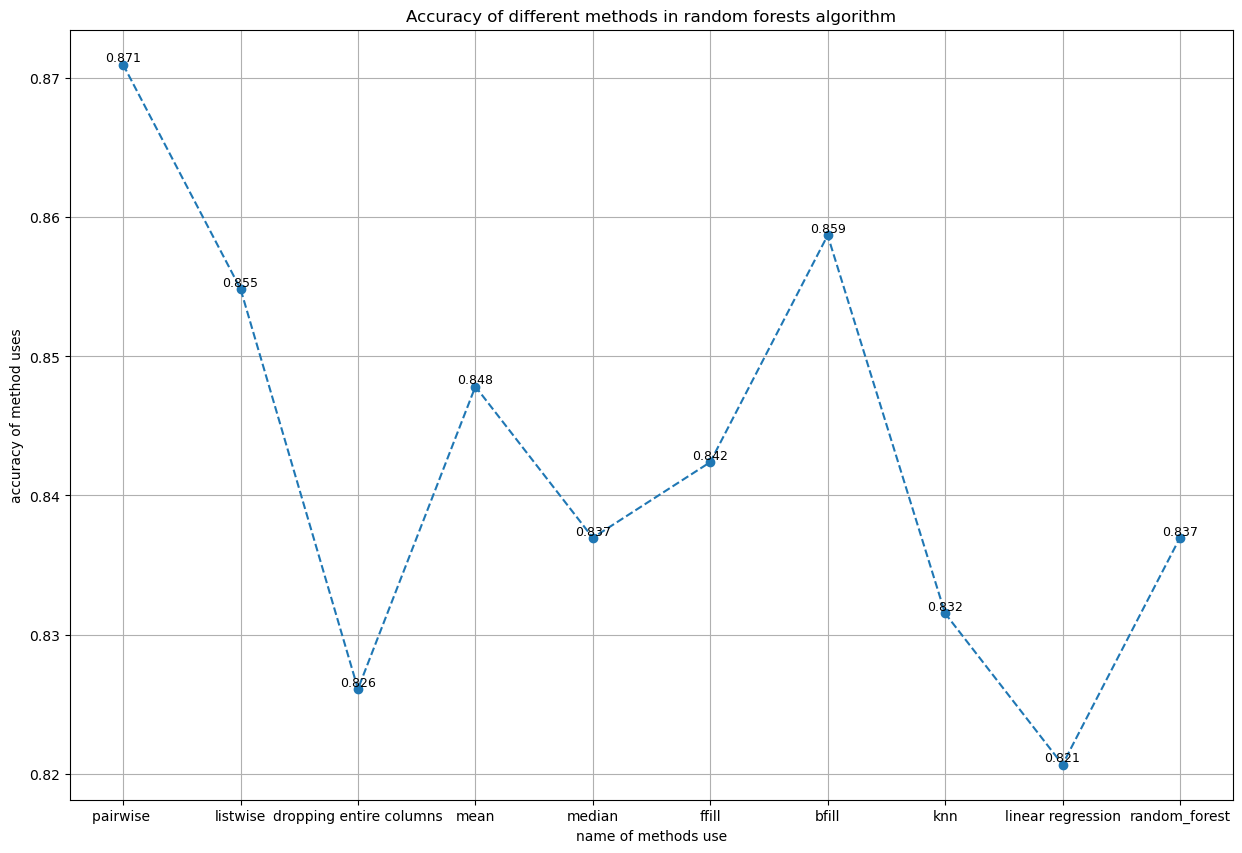

In [89]:
plt.figure(figsize=(15, 10))

x = list(accuracy.keys())
y = list(accuracy.values())

for _x, _y in zip(x, y):
    plt.text(_x, _y, f'{_y:.3f}', fontsize=9, ha='center', va='bottom')
plt.plot(x, y, marker='o', linestyle='--')
plt.xlabel("name of methods use")
plt.ylabel("accuracy of method uses")
plt.title("Accuracy of different methods in random forests algorithm")
plt.grid(True)
plt.show()